In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
import pandas as pd

file_comuni = 'C:/Users/leand/Desktop/comuni_clean.csv'
file_rip = 'C:/Users/leand/Desktop/ripartizioni_clean.csv'
file_prov = 'C:/Users/leand/Desktop/province_clean.csv'
file_reg = 'C:/Users/leand/Desktop/regioni_clean.csv'

comuni_clean = pd.read_csv(file_comuni,na_filter=False)
ripartizioni_clean = pd.read_csv(file_rip)
province_clean = pd.read_csv(file_prov)
regioni_clean = pd.read_csv(file_reg)


In [82]:
# creo un una funzione che prende in input una Regione e mi ritorna un output con tutti i comuni ripetuti una sola volta
def comuni_per_regione(regione):
    comuni_regione = comuni_clean[comuni_clean['Regione'].str.contains(regione, case=False, na=False)]['Denominazione'].drop_duplicates().tolist()
    return comuni_regione
comuni_di_interesse = comuni_per_regione("Valle d'aosta")
print(comuni_di_interesse)
# sviluppato da un codice che prende in input una Regione che mi ritorni un output con tutti i comuni ripetuti una sola volta (facoltativo) 
#Regione = input("Inserisci una Regione: ")
#comuni_regione = comuni_clean[comuni_clean['Regione'].str.contains(Regione, case=False, na=False)]['Denominazione'].drop_duplicates().tolist()
#print(f"I comuni della regione '{Regione}' sono: {comuni_regione}")

# creo una stringa in input che riporta le informazioni scelte in output
#Regione = str(input("Inserisci una Regione : "))
#informazioni_regione = regioni_clean[regioni_clean['RegionName'] == Regione]
#print(informazioni_regione)

['Allein', 'Antey-Saint-Andre', 'Aosta', 'Arnad', 'Arvier', 'Avise', 'Ayas', 'Aymavilles', 'Bard', 'Bionaz', 'Brissogne', 'Brusson', 'Challand-Saint-Anselme', 'Challand-Saint-Victor', 'Chambave', 'Chamois', 'Champdepraz', 'Champorcher', 'Charvensod', 'Chatillon', 'Cogne', 'Courmayeur', 'Donnas', 'Doues', 'Emarese', 'Etroubles', 'Fenis', 'Fontainemore', 'Gaby', 'Gignod', 'Gressan', 'Gressoney-La-Trinite', 'Gressoney-Saint-Jean', 'Hone', 'Introd', 'Issime', 'Issogne', 'Joven an', 'La Magdeleine', 'La Salle', 'La Thuile', 'Lillianes', 'Montjovet', 'Morgex', 'Nus', 'Ollomont', 'Oyace', 'Perloz', 'Pollein', 'Pontboset', 'Pontey', 'Pont-Saint-Martin', 'Pre-Saint-Didier', 'Quart', 'Rhemes-Notre-Dame', 'Rhemes-Saint-Georges', 'Roisan', 'Saint-Christophe', 'Saint-Denis', 'Saint-Marcel', 'Saint-Nicolas', 'Saint-Oyen', 'Saint-Pierre', 'Saint-Rhemy-en-Bosses', 'Saint-Vincent', 'Sarre', 'Torgnon', 'Valgrisenche', 'Valpelline', 'Valsavarenche', 'Valtournenche', 'Verrayes', 'Verres', 'Villeneuve']


In [83]:
#calcolo totale decessi
#print(regioni_clean.tail(21))
stampa_dati_finali=regioni_clean.tail(21)
stampa=stampa_dati_finali['TotalPositiveCases'].sum()
print(stampa)

1728878


In [84]:
#facendo una merge tra 2 dataset aggiungo la colonna ripartizioni geografiche alle regioni
import pandas as pd

regioni = pd.read_csv('C:/Users/leand/Desktop/bw2/covid19_italy_region_python.csv')
regioni_clean = regioni.dropna(how='all').drop_duplicates()

Ripartizioni = pd.read_csv('C:/Users/leand/Desktop/bw2/Ripartizione_geografica_python.csv', sep=";")
Ripartizioni_clean = Ripartizioni.dropna(how='all')

result = pd.merge(regioni_clean, Ripartizioni_clean, left_on='RegionCode', right_on='Codice Regione', how='inner')

print(result)

       SNo                 Date Country  RegionCode RegionName   Latitude  \
0        0  2020-02-24T18:00:00     ITA          13    Abruzzo  42.351222   
1       21  2020-02-25T18:00:00     ITA          13    Abruzzo  42.351222   
2       42  2020-02-26T18:00:00     ITA          13    Abruzzo  42.351222   
3       63  2020-02-27T18:00:00     ITA          13    Abruzzo  42.351222   
4       84  2020-02-28T18:00:00     ITA          13    Abruzzo  42.351222   
...    ...                  ...     ...         ...        ...        ...   
5448  5942  2020-12-02T17:00:00     ITA           5     Veneto  45.434905   
5449  5963  2020-12-03T17:00:00     ITA           5     Veneto  45.434905   
5450  5984  2020-12-04T17:00:00     ITA           5     Veneto  45.434905   
5451  6005  2020-12-05T17:00:00     ITA           5     Veneto  45.434905   
5452  6026  2020-12-06T17:00:00     ITA           5     Veneto  45.434905   

      Longitude  HospitalizedPatients  IntensiveCarePatients  \
0     13.39

regioni_somma_contagi                       RegionName  TotalPositiveCases
0                        Abruzzo               30274
1                     Basilicata                8940
2                       Calabria               18537
3                       Campania              165293
4                 Emilia-Romagna              133761
5          Friuli-Venezia Giulia               35467
6                          Lazio              130255
7                        Liguria               53779
8                      Lombardia              429109
9                         Marche               32393
10                        Molise                5286
11                      Piemonte              177788
12                        Puglia               64341
13                      Sardegna               24186
14                       Sicilia               71489
15                       Toscana              108397
16  Trentino-Alto Adige/Sudtirol               25361
17                      

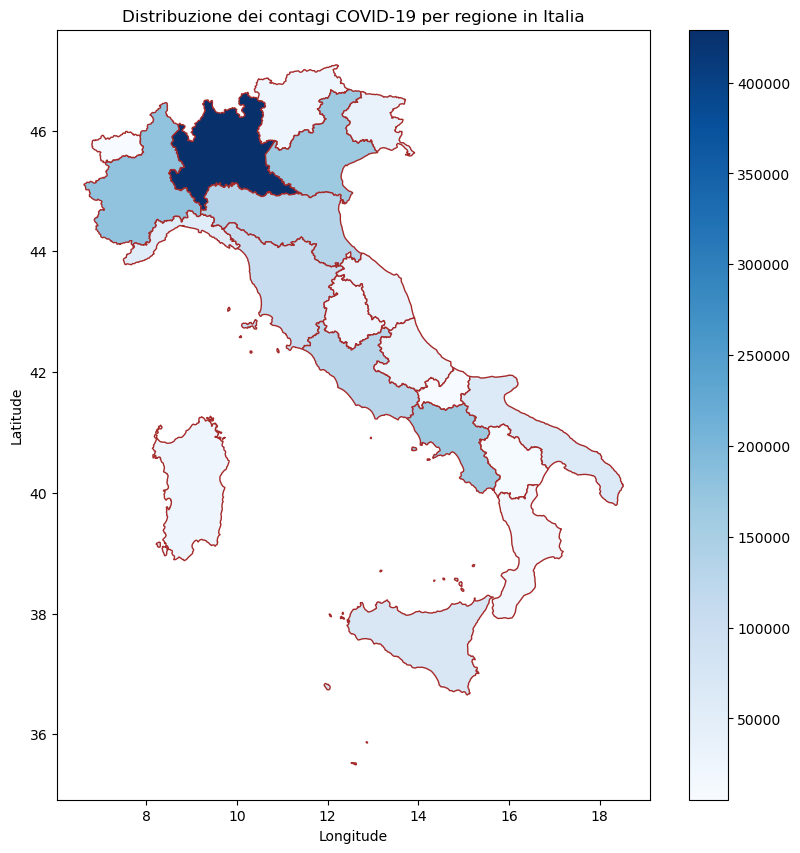

In [85]:
#CONTAGI Massimi
import matplotlib.pyplot as plt
import geopandas as gpd
italy = gpd.read_file("C:/Users/leand/Desktop/bw2/italy-with-regions_357.geojson")
regioni_somma_contagi = regioni_clean.groupby('RegionName')['TotalPositiveCases'].max().reset_index()
print("regioni_somma_contagi", regioni_somma_contagi)
italy_with_cases = italy.merge(regioni_somma_contagi, left_on='name', right_on='RegionName', how='left')
italy_with_cases.plot(column='TotalPositiveCases', cmap='Blues', edgecolor='brown', legend=True, figsize=(10, 10))
plt.title('Distribuzione dei contagi COVID-19 per regione in Italia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

regioni_decessi                       RegionName  Deaths
0                        Abruzzo     980
1                     Basilicata     175
2                       Calabria     343
3                       Campania    1990
4                 Emilia-Romagna    6162
5          Friuli-Venezia Giulia    1035
6                          Lazio    2622
7                        Liguria    2521
8                      Lombardia   23024
9                         Marche    1327
10                        Molise     135
11                      Piemonte    6623
12                        Puglia    1712
13                      Sardegna     531
14                       Sicilia    1759
15                       Toscana    2867
16  Trentino-Alto Adige/Sudtirol     691
17                        Umbria     460
18                 Valle d'Aosta     333
19                        Veneto    4210


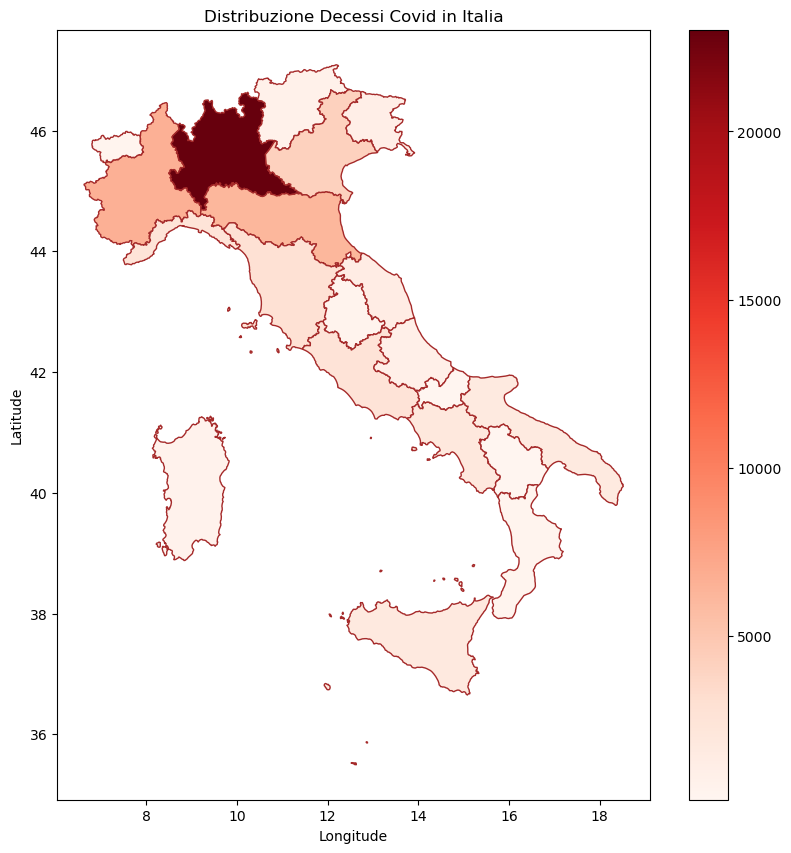

In [86]:
# Decessi massimi
import matplotlib.pyplot as plt
import geopandas as gpd
regioni_decessi = regioni_clean.groupby('RegionName')['Deaths'].max().reset_index()
print("regioni_decessi", regioni_decessi)
italy_with_cases = italy.merge(regioni_decessi, left_on='name', right_on='RegionName', how='left')
italy_with_cases.plot(column='Deaths', cmap='Reds', edgecolor='brown', legend=True, figsize=(10, 10))
plt.title('Distribuzione Decessi Covid in Italia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

regioni_guariti                       RegionName  Recovered
0                        Abruzzo      12206
1                     Basilicata       2397
2                       Calabria       7533
3                       Campania      62060
4                 Emilia-Romagna      59432
5          Friuli-Venezia Giulia      19401
6                          Lazio      33422
7                        Liguria      40842
8                      Lombardia     289706
9                         Marche      11008
10                        Molise       2438
11                      Piemonte     105127
12                        Puglia      16795
13                      Sardegna       8695
14                       Sicilia      29984
15                       Toscana      76331
16  Trentino-Alto Adige/Sudtirol      13995
17                        Umbria      18619
18                 Valle d'Aosta       5406
19                        Veneto      84235


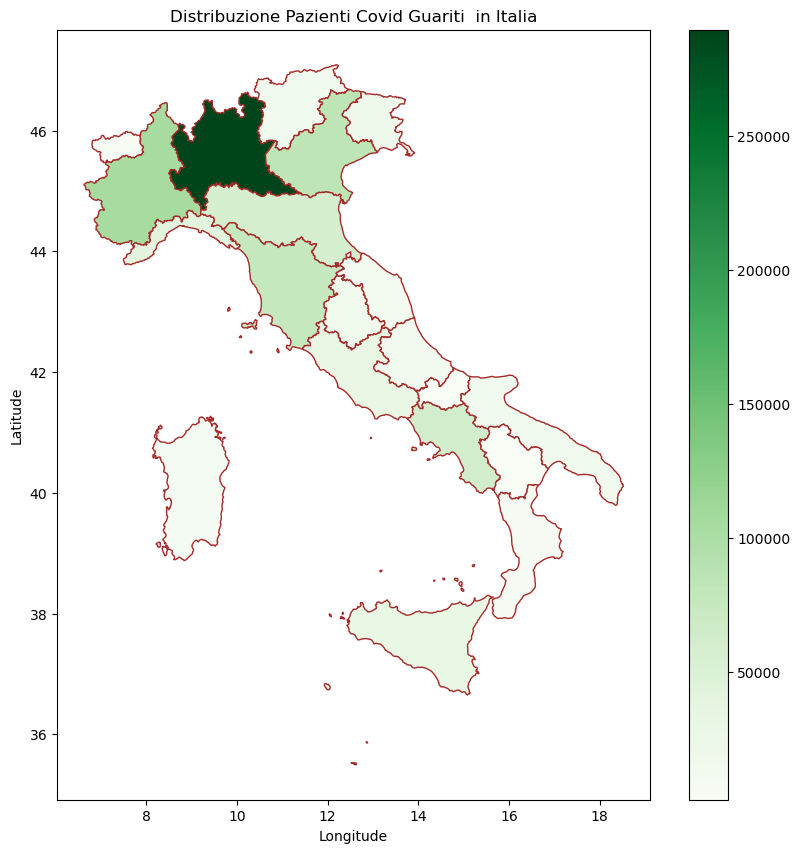

In [87]:
# Pazienti guariti massimi
import matplotlib.pyplot as plt
import geopandas as gpd
regioni_guariti = regioni_clean.groupby('RegionName')['Recovered'].max().reset_index()
print("regioni_guariti", regioni_guariti)
italy_with_cases = italy.merge(regioni_guariti, left_on='name', right_on='RegionName', how='left')
italy_with_cases.plot(column='Recovered', cmap='Greens', edgecolor='brown', legend=True, figsize=(10, 10))
plt.title('Distribuzione Pazienti Covid Guariti  in Italia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Le tre regioni con il maggior tasso di pazienti ospedalizzati totali sono:
RegionName
Lombardia         13328
Piemonte           5618
Emilia-Romagna     4310
Name: TotalHospitalizedPatients, dtype: int64


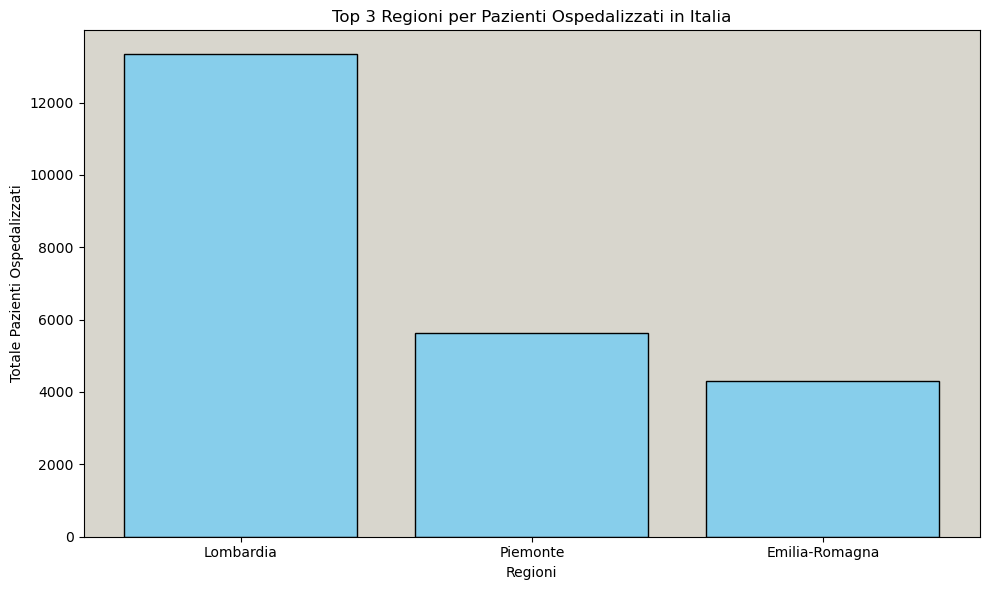

In [88]:
#le 3 regioni d'italia per il Totale di pazienti ospedalizzati  
total_hospitalized_by_region = regioni_clean.groupby('RegionName')['TotalHospitalizedPatients'].max()
sorted_regions = total_hospitalized_by_region.sort_values(ascending=False)
top_3_regions = sorted_regions.head(3)
print("Le tre regioni con il maggior tasso di pazienti ospedalizzati totali sono:")
print(top_3_regions)


import matplotlib.pyplot as plt

region_names = top_3_regions.index
total_hospitalized_counts = top_3_regions.values

plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('#D8D6CD')
plt.bar(region_names, total_hospitalized_counts, color='skyblue',edgecolor='black')
plt.xlabel('Regioni')
plt.ylabel('Totale Pazienti Ospedalizzati')
plt.title('Top 3 Regioni per Pazienti Ospedalizzati in Italia')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Le tre regioni con il maggior tasso di pazienti guariti sono:
RegionName
Lombardia    289706
Piemonte     105127
Veneto        84235
Name: Recovered, dtype: int64


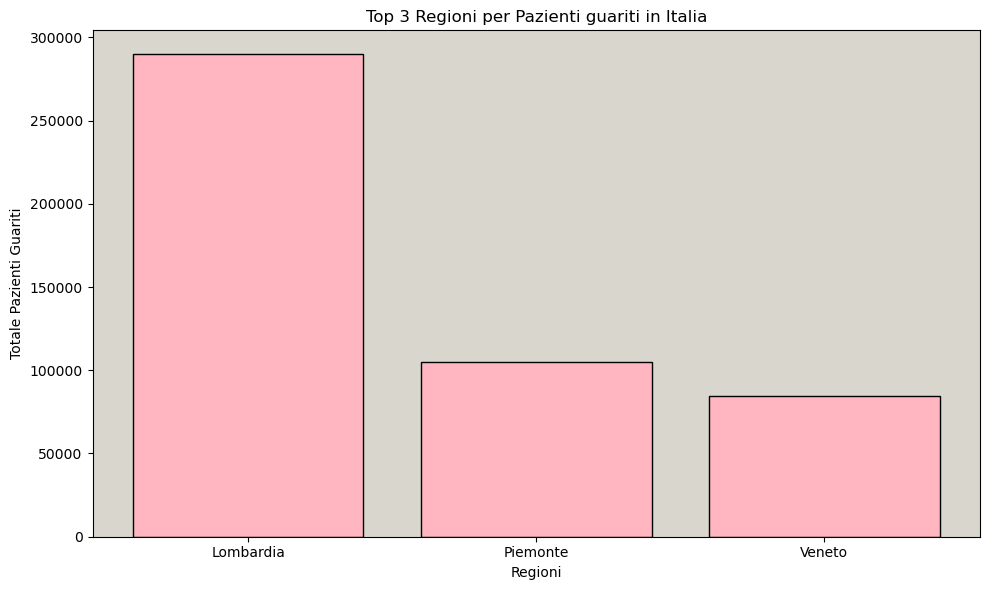

In [89]:
#TOP 3 regioni con maggior numero di pazienti guariti
total_Recovered_by_region = regioni_clean.groupby('RegionName')['Recovered'].max()
sorted_regions = total_Recovered_by_region.sort_values(ascending=False)
top_3_regions = sorted_regions.head(3)
print("Le tre regioni con il maggior tasso di pazienti guariti sono:")
print(top_3_regions)

region_names = top_3_regions.index
total_hospitalized_counts = top_3_regions.values

plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('#D8D6CD')
plt.bar(region_names, total_hospitalized_counts, color='lightpink',edgecolor='black')
plt.xlabel('Regioni')
plt.ylabel('Totale Pazienti Guariti')
plt.title('Top 3 Regioni per Pazienti guariti in Italia')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Le dieci province con il maggior tasso di pazienti positivi sono:
ProvinceName
Milano                   158717
Napoli                   102702
Roma                      96985
Torino                    94349
Varese                    45944
Monza e della Brianza     44603
Brescia                   36010
Treviso                   31952
Genova                    31864
Padova                    31073
Name: TotalPositiveCases, dtype: int64


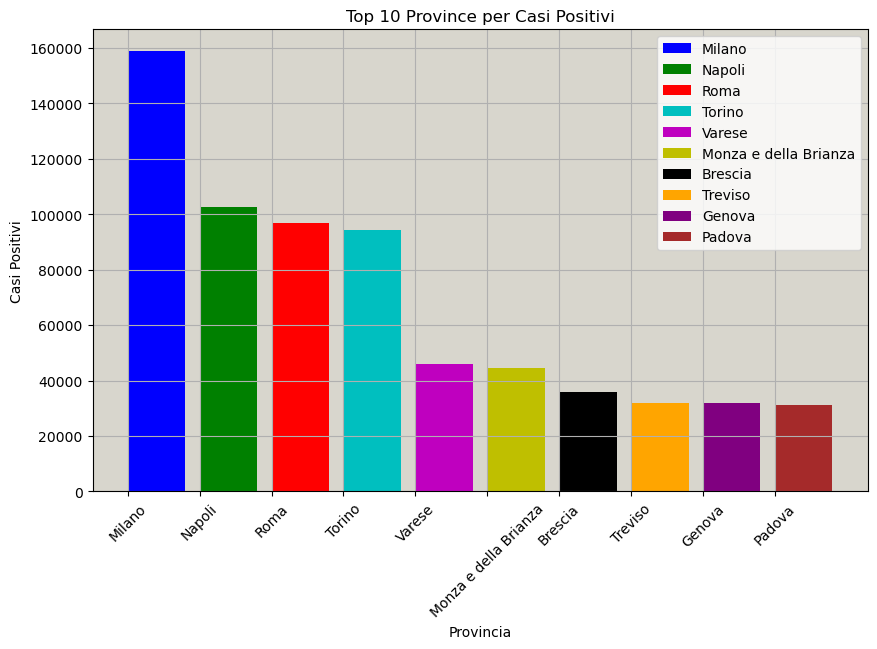

In [90]:
# top 10 province per casi positivi
Total_Positive_Cases_province = province_clean.groupby('ProvinceName')['TotalPositiveCases'].max()
sorted_province = Total_Positive_Cases_province.sort_values(ascending=False)
top_10_province = sorted_province.head(10)
print("Le dieci province con il maggior tasso di pazienti positivi sono:")
print(top_10_province)

# Creazione del grafico con colori diversi per ciascuna provincia

province = top_10_province.index
total_cases = top_10_province.values

plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('#D8D6CD')
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
for i in range(len(province)):
    plt.bar(province[i], total_cases[i], color=colors[i], label=province[i], align='edge')

plt.title("Top 10 Province per Casi Positivi")
plt.xlabel("Provincia")
plt.ylabel("Casi Positivi")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

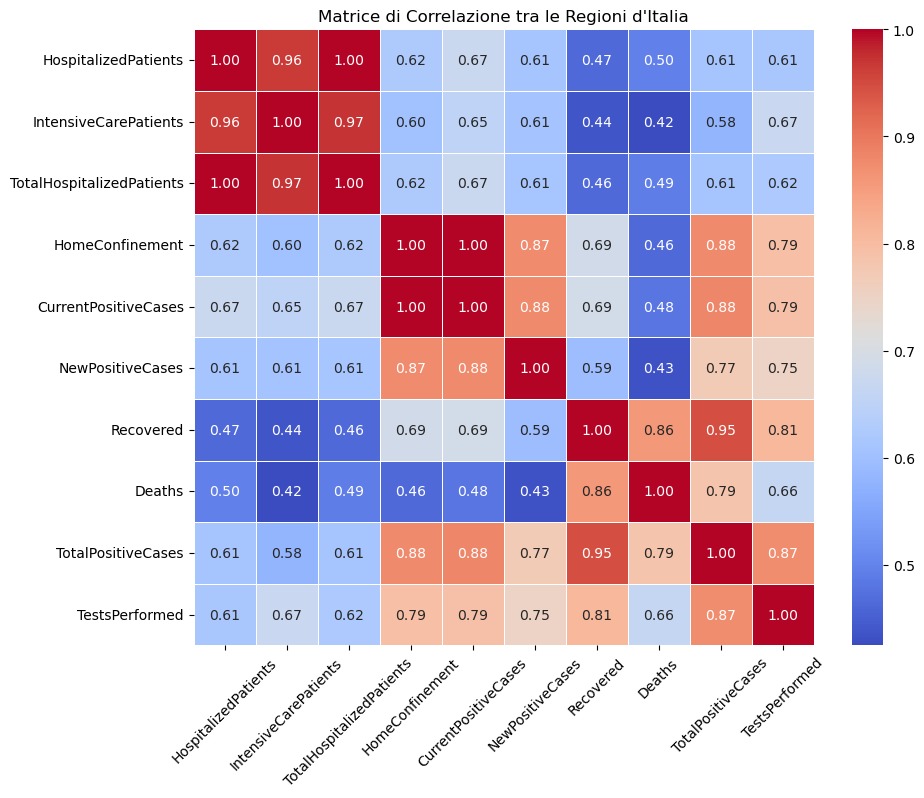

In [91]:
#Matrice di correlazione tra le categorie contenute in Regione
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

regioni = pd.read_csv('C:/Users/leand/Desktop/bw2/covid19_italy_region_python.csv')
regioni_clean = regioni.dropna(how='all').drop_duplicates()

colonne_numeriche = regioni_clean.select_dtypes(include='number').columns
corr_matrix = regioni_clean[colonne_numeriche].corr()

corr_matrix = corr_matrix.iloc[4:, 4:]

plt.figure(figsize=(10, 8))
plt.gca().set_facecolor('#D8D6CD')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matrice di Correlazione tra le Regioni d\'Italia')
plt.xticks(rotation=45)
plt.show()

                              count          mean          std  min      25%  \
RegionName                                                                     
Abruzzo                       287.0    412.188153   205.593205  0.0    338.0   
Basilicata                    287.0     33.801394    31.523090  0.0     25.0   
Calabria                      287.0     97.013937    58.899165  0.0     88.5   
Campania                      287.0    470.588850   351.108681  0.0    372.5   
Emilia-Romagna                287.0   3758.376307  1454.794924  0.0   3721.0   
Friuli-Venezia Giulia         287.0    325.515679   173.187635  0.0    304.5   
Lazio                         287.0    811.693380   532.126717  0.0    536.0   
Liguria                       287.0   1357.435540   596.388034  0.0   1237.5   
Lombardia                     287.0  14552.163763  5457.487022  6.0  14500.0   
Marche                        287.0    868.832753   318.123794  0.0    939.5   
Molise                        287.0     

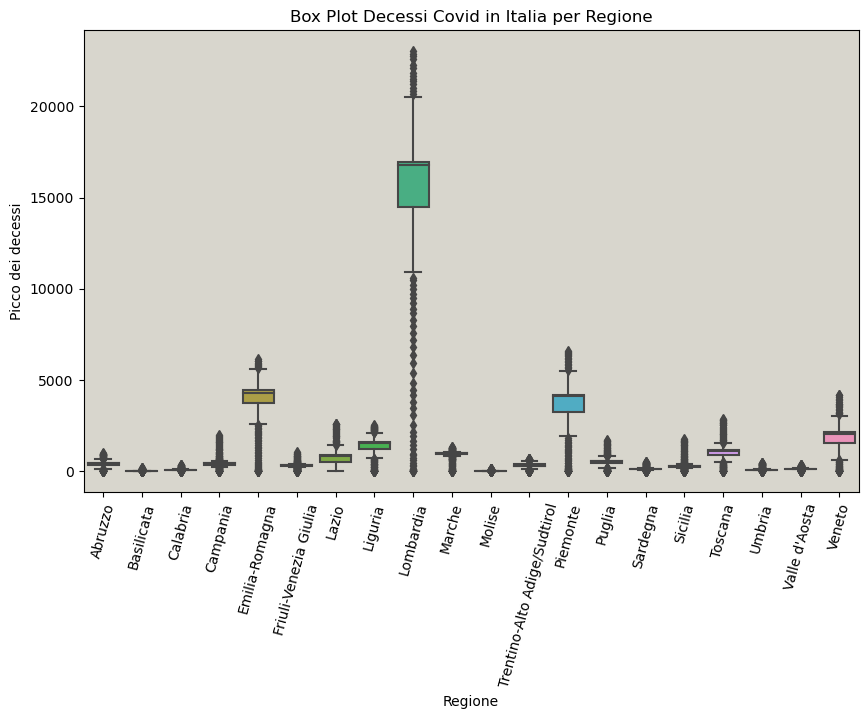

In [92]:
#BOXPLOT import matplotlib.pyplot as plt
import seaborn as sns
# Rimuovere la riga corrispondente alla regione "Lombardia"
#regioni_decessi = regioni_clean[regioni_clean['RegionName'] != 'Lombardia']
#regioni_decessi = regioni_clean['RegionName']
regioni_somma_decessi = regioni_clean.groupby('RegionName')['Deaths']
print(regioni_somma_decessi.describe())
# Plot del boxplot
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('#D8D6CD')
sns.boxplot(data=regioni_clean, x='RegionName', y='Deaths')
plt.xlabel('Regione')
plt.ylabel('Picco dei decessi')
plt.title('Box Plot Decessi Covid in Italia per Regione')
plt.xticks(rotation=75)  # Rotazione delle etichette sull'asse x per una migliore leggibilità
plt.show()

          Date  NewPositiveCases
0   2020-02-24               221
1   2020-02-25                93
2   2020-02-26                78
3   2020-02-27               250
4   2020-02-28               238
..         ...               ...
282 2020-12-02             20709
283 2020-12-03             23225
284 2020-12-04             24099
285 2020-12-05             21052
286 2020-12-06             18887

[287 rows x 2 columns]


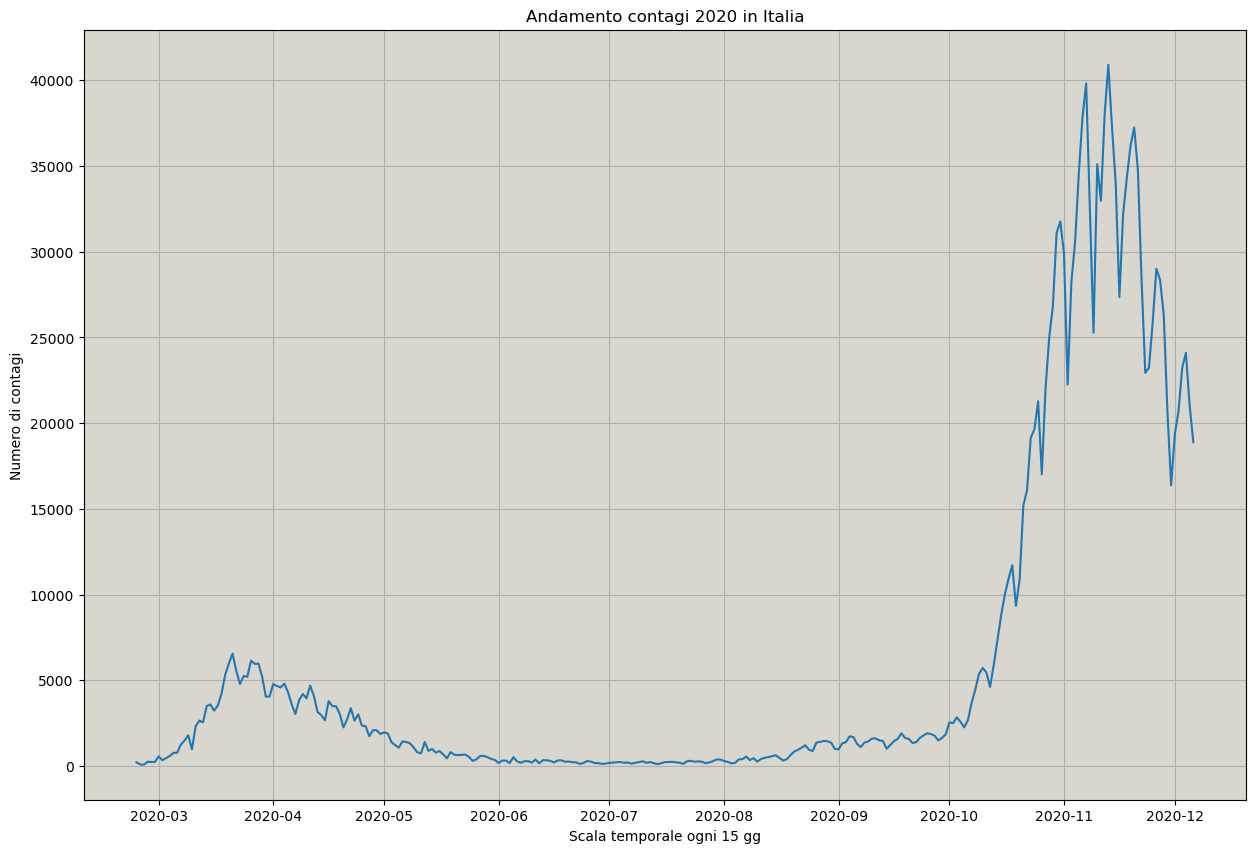

In [93]:
#evoluzione contagio nel tempo
import matplotlib.pyplot as plt

regioni_clean = regioni.dropna(how='all').drop_duplicates()
regioni_clean['Date']=pd.to_datetime(regioni_clean['Date'])
regioni_clean.set_index('Date', inplace=True)
andamento_contagi_mezzo_mese = regioni_clean.resample('D')['NewPositiveCases'].sum().reset_index()
print(andamento_contagi_mezzo_mese)
plt.figure(figsize=(15, 10))
plt.gca().set_facecolor('#D8D6CD')
plt.plot(andamento_contagi_mezzo_mese['Date'],andamento_contagi_mezzo_mese['NewPositiveCases'])
plt.grid(True)
plt.title('Andamento contagi 2020 in Italia')
plt.xlabel('Scala temporale ogni 15 gg')
plt.ylabel('Numero di contagi')
plt.show()

          Date  NewPositiveCases  Deaths  nuovi_morti
0   2020-02-24               221       7            7
1   2020-02-25                93      10            3
2   2020-02-26                78      12            2
3   2020-02-27               250      17            5
4   2020-02-28               238      21            4
..         ...               ...     ...          ...
282 2020-12-02             20709   57045          684
283 2020-12-03             23225   58038          993
284 2020-12-04             24099   58852          814
285 2020-12-05             21052   59514          662
286 2020-12-06             18887   60078          564

[287 rows x 4 columns]


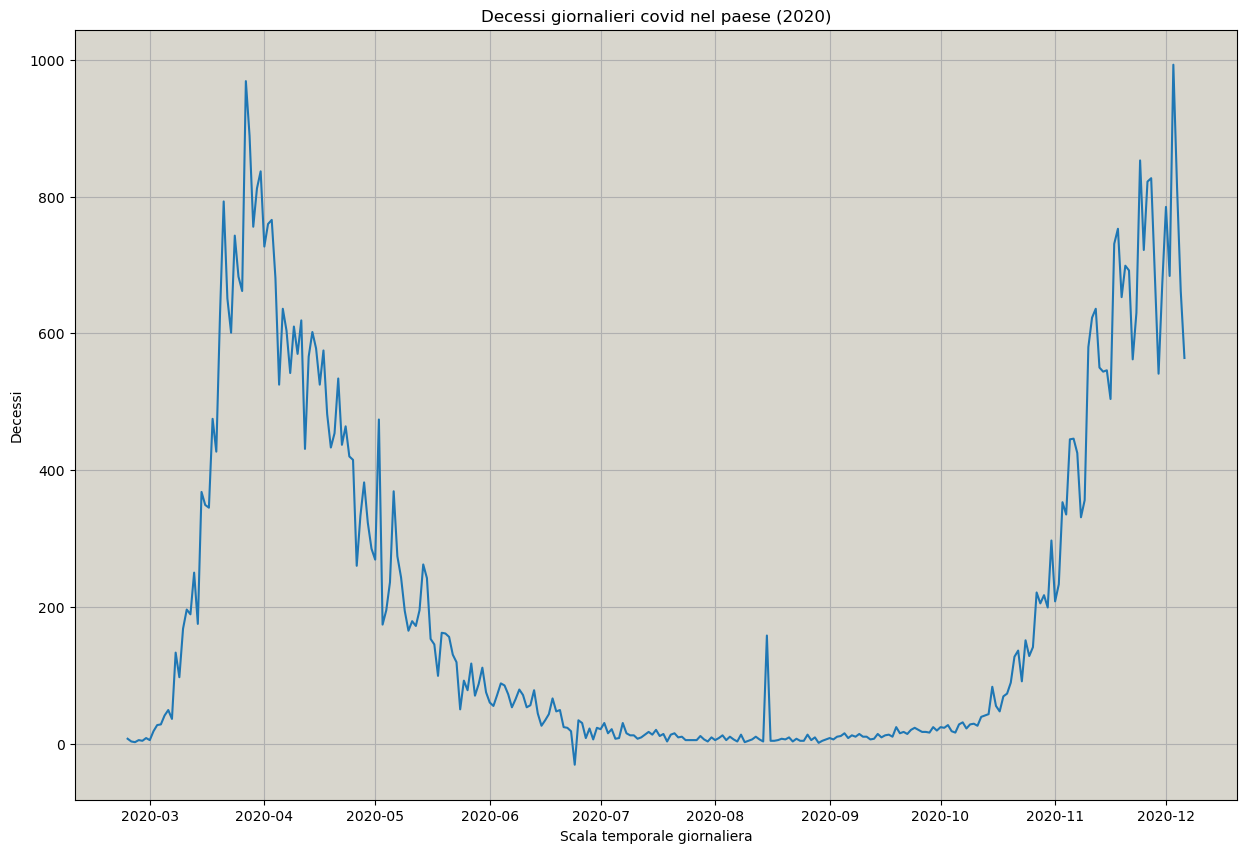

In [94]:
#Calcolo mortalità giornaliera in italia nel 2020
regioni = pd.read_csv('C:/Users/leand/Desktop/bw2/covid19_italy_region_python.csv')
regioni_clean = regioni.dropna(how='all').drop_duplicates()
regioni_clean['Date']=pd.to_datetime(regioni_clean['Date'])
regioni_clean.set_index('Date', inplace=True)
contagimorti_giornalieri=regioni_clean.resample('D')[['NewPositiveCases','Deaths']].sum().reset_index()
contagimorti_giornalieri['nuovi_morti']=0
for i in range(0, 287):
        if i==0:
                contagimorti_giornalieri.iloc[0,3]=contagimorti_giornalieri.iloc[0,2]
        else:
                contagimorti_giornalieri.iloc[i,3]=contagimorti_giornalieri.iloc[i,2]-contagimorti_giornalieri.iloc[(i-1),2]
    
print(contagimorti_giornalieri)

plt.figure(figsize=(15, 10))
plt.gca().set_facecolor('#D8D6CD')
plt.plot(contagimorti_giornalieri.iloc[:,0],contagimorti_giornalieri.iloc[:,3])
plt.grid(True)
plt.title('Decessi giornalieri covid nel paese (2020)')
plt.xlabel('Scala temporale giornaliera')
plt.ylabel('Decessi')
plt.show()

                      Territorio  Osservazione                    RegionName  \
0                       Piemonte           8.9                      Piemonte   
1                  Valle d'aosta           6.3                 Valle d'aosta   
2                        Liguria          10.6                       Liguria   
3                      Lombardia           9.0                     Lombardia   
4   Trentino-Alto Adige/sudtirol           4.8  Trentino-Alto Adige/sudtirol   
5                         Veneto           8.0                        Veneto   
6          Friuli-Venezia giulia           7.8         Friuli-Venezia giulia   
7                 Emilia-romagna           7.6                Emilia-romagna   
8                        Toscana           7.8                       Toscana   
9                         Umbria          10.8                        Umbria   
10                        Marche          14.6                        Marche   
11                         Lazio        

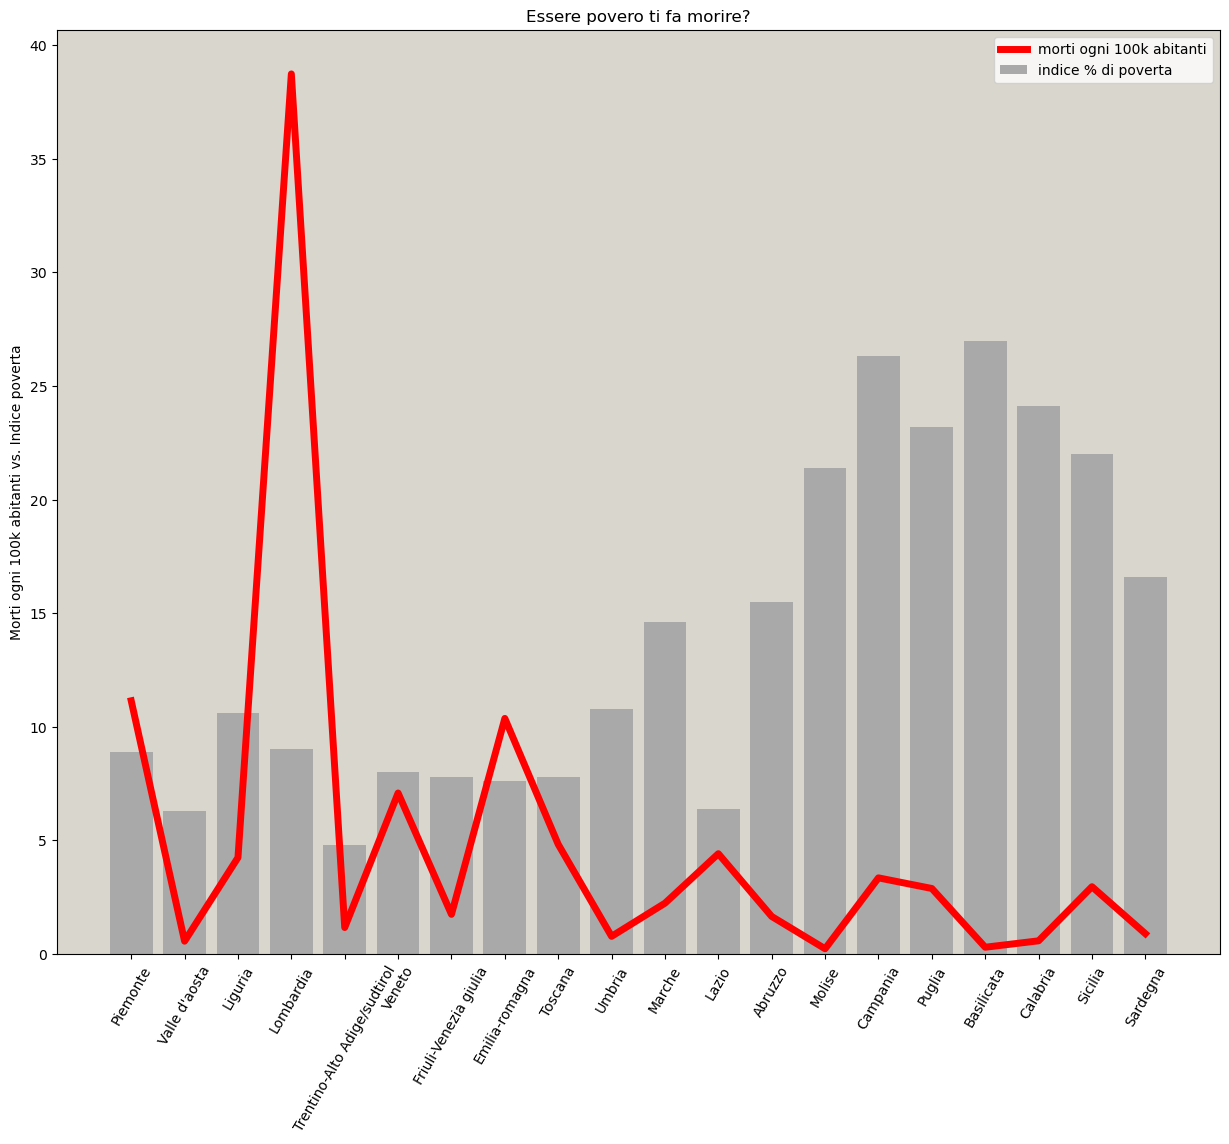

In [95]:
import pandas as pd
import seaborn as sns
import geopandas as gp
import matplotlib.image as mpimg
from matplotlib import pyplot as pp
import matplotlib.colors as mcolors
import requests
from bs4 import BeautifulSoup

file_comuni='./comuni_clean.csv'
file_rip='./ripartizioni_clean.csv'
file_prov='./province_clean.csv'
file_reg='./regioni_clean.csv'

comuni_clean=pd.read_csv(file_comuni)
ripartizioni_clean=pd.read_csv(file_rip)
province_clean=pd.read_csv(file_prov)
regioni_clean=pd.read_csv(file_reg)
regioni_clean.iloc[:,2]=pd.to_datetime(regioni_clean.iloc[:,2])
comuni_clean=comuni_clean.drop('Unnamed: 0', axis=1)
ripartizioni_clean=ripartizioni_clean.drop('Unnamed: 0', axis=1)
province_clean=province_clean.drop('Unnamed: 0', axis=1)
regioni_clean=regioni_clean.drop('Unnamed: 0', axis=1)
#                                                      ESISTERA' UNA CORRELAZIONE TRA POVERTA' E MORTE DURANTE LA PANDEMIA (2020)?
#                                                                                         |
#                                                                                         |
#                                                                                         V
# Per poterlo costatare dobbiamo in primo luogo importarci un nuovo dataset, che ci mostra gli indici percentuali di povertà, intendendo il numero di persone sottostanti la soglia di povertà.
# In questo caso prendiamo il dato del 2020 --> il dataset risultava pieno di righe non utili all'analisi e di minuscole/minuscole trattini, nel campo regione, che sono stai puliti ed equiparati
# ai nomi di regione usati negli altri dataset. Dopodiché, dopo aver effettuato la pulizia esportiamo il dataset in un nuovo dataset 'poveri_regione_clean.csv'
# D'altro vogliamo capire quanti morti ogni 100 mila abitanti ci sono stati nelle varie regioni. Per saperlo, abbiamo bisogno di 2 dati --> gli abitanti di ogni regione, che otteniamo sommando 
# per regione gli abitanti dei singoli comuni dal file 'comuni_clean.csv' e nella tabella regioni_clean prendiamo il max dei morti nella regione (il max corrisponde al dato ultimo e più aggiornato)
# del dataset, che racchiude i morti complessivi del 2020 di covid-19 fino a quel momento

#IMPORTO LA TABELLA CON GLI INDICI DI POVERTA', RIMUOVENDO LA SOLITA COLONNA CREATASI DOPO L'ESPORTAZIONE DEL FILE PULITO
poveri_regione=pd.read_csv('./poveri_regione_clean.csv')
poveri_regione=poveri_regione.drop(['Unnamed: 0'], axis=1)

#CONVERTO LA COLONNA POPOLAZIONE2011 CHE RISULTAVA STRINGA, IN NUMERO
comuni_clean['Popolazione2011'] = pd.to_numeric(comuni_clean['Popolazione2011'])

#OTTENGO GLI ABITANTI DI OGNI REGIONE COME SOMMA DEGLI ABITANTI DEI SINGOLI COMUNI APPARTENENTI A QUELLA DET. REGIONE
abitanti_regione=comuni_clean.groupby('Regione')['Popolazione2011'].sum()

#PRENDO IL VALORE PIU' AGGIORNATO DI MORTI ALL'INTERNO DELLA REGIONE
regioni_raggruppate=regioni_clean.groupby('RegionName')['Deaths'].max().reset_index()

#FACCIO UNA PRIMA MERGE TRA INDICE DI POVERTA' E MORTI
join_poveri_covidcase = pd.merge(poveri_regione, regioni_raggruppate, left_on='Territorio', right_on='RegionName', how='inner')
#print(abitanti_regione)
#print(join_poveri_covidcase['Territorio'])

#FACCIO LA SECONDA MERGE, PER POTER AVERE DISPONIBILE IL TOTALE ABITANTI DELLA REGIONE --> COSì POSSO FARE IL RAPPORTO DEATHS/100K ABITANTI
complessivo_contagi=pd.merge(join_poveri_covidcase, abitanti_regione, left_on='Territorio', right_on='Regione', how='inner')
print(complessivo_contagi)


plt.figure(figsize=(15,12))
plt.gca().set_facecolor('#D8D6CD')
plt.plot(complessivo_contagi['Territorio'],(complessivo_contagi['Deaths']/complessivo_contagi['Popolazione2011'].sum())*100000, color='red',linewidth=5, label='morti ogni 100k abitanti')
plt.bar(complessivo_contagi['Territorio'],complessivo_contagi['Osservazione'], color='darkgrey', label='indice % di poverta')
plt.xticks(rotation=60)
plt.title('Essere povero ti fa morire?')
plt.ylabel('Morti ogni 100k abitanti vs. Indice poverta')
plt.legend()
plt.show()

In [96]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
# URL del sito web
url = 'https://it.wikipedia.org/wiki/Regioni_d%27Italia#Dati_demografici_e_geografici'
# Effettua una richiesta GET al sito
response = requests.get(url)
# Verifica se la richiesta è andata a buon fine
if response.status_code == 200:
    # Utilizza BeautifulSoup per analizzare il contenuto HTML della pagina
    soup = BeautifulSoup(response.content, 'html.parser')
    # Trova la tabella delle regioni
    table = soup.find('table', {'class': 'wikitable'})
    # Inizializza una lista per memorizzare i dati
    data = []
    # Estrai i dati dalla tabella
    rows = table.find_all('tr')
    for row in rows[1:]:  # Salta la riga delle intestazioni
        cells = row.find_all(['th', 'td'])
        regione = cells[0].text.strip()
        superficie = cells[3].text.strip() 
        data.append([regione, superficie])
    # Crea un DataFrame pandas
    df = pd.DataFrame(data, columns=['Regione', 'Superficie'])
    df = df.drop(df.index[-1])
    # Stampa il DataFrame
    print(df)
else:
    print('Errore nella richiesta HTTP')
   
 
   
    print(ripartizioni_clean, regioni_clean['RegionName'].unique(), "df", df)


                  Regione Superficie
0               Lombardia  23 863,10
1                   Lazio  17 231,72
2                Campania  13 670,60
3                  Veneto  18 345,37
4                 Sicilia  25 832,55
5          Emilia-Romagna  22 501,43
6                Piemonte  25 386,70
7                  Puglia  19 540,52
8                 Toscana  22 987,44
9                Calabria  15 221,61
10               Sardegna  24 099,45
11                Liguria   5 416,15
12                 Marche   9 344,29
13                Abruzzo  10 831,50
14  Friuli-Venezia Giulia   7 932,48
15    Trentino-Alto Adige  13 604,72
16                 Umbria   8 464,22
17             Basilicata  10 073,11
18                 Molise   4 460,44
19          Valle d'Aosta   3 260,85


                  Regione  Popolazione2011  Superficie     densita  \
0                 abruzzo        1307309.0    10831.50  120.695102   
1              basilicata         578036.0    10073.11   57.384065   
2                calabria        1959050.0    15221.61  128.701892   
3                campania        5766810.0    13670.60  421.840300   
4          emilia-romagna        4342135.0    22501.43  192.971513   
5   friuli-venezia giulia        1220291.0     7932.48  153.834740   
6                   lazio        5502886.0    17231.72  319.346299   
7                 liguria        1570694.0     5416.15  290.001939   
8               lombardia        9704151.0    23863.10  406.659277   
9                  marche        1541319.0     9344.29  164.947685   
10                 molise         313660.0     4460.44   70.320417   
11               piemonte        4363916.0    25386.70  171.897726   
12                 puglia        4052566.0    19540.52  207.392946   
13               sar

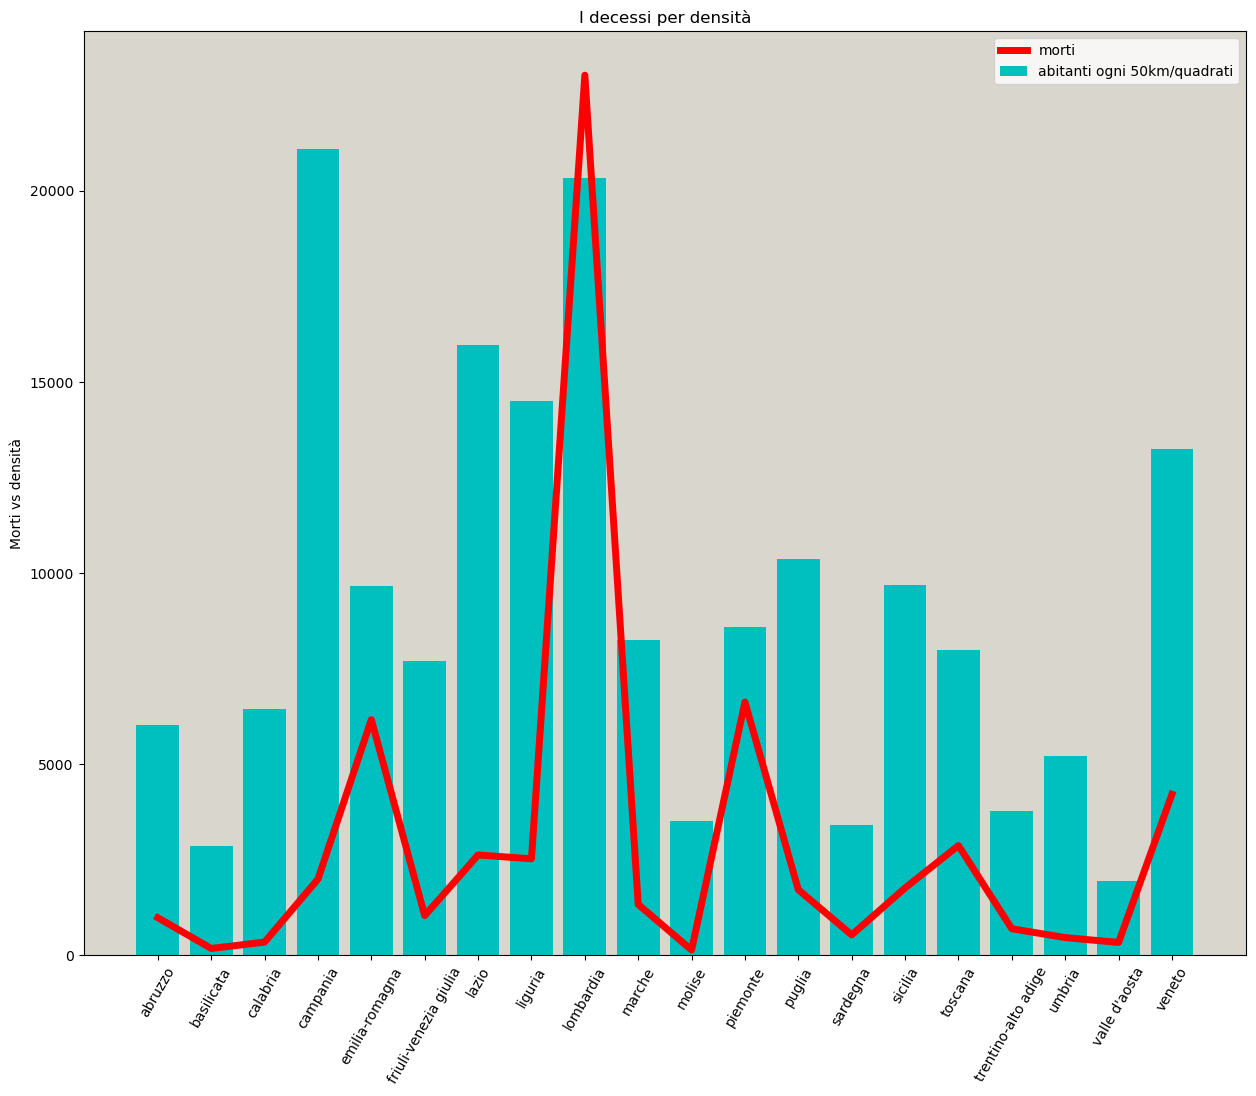

In [97]:
import pandas as pd
import seaborn as sns
import geopandas as gp
import matplotlib.image as mpimg
from matplotlib import pyplot as pp
import matplotlib.colors as mcolors
import requests
from bs4 import BeautifulSoup


comuni_clean=pd.read_csv(file_comuni)
ripartizioni_clean=pd.read_csv(file_rip)
province_clean=pd.read_csv(file_prov)
regioni_clean=pd.read_csv(file_reg)
regioni_clean.iloc[:,2]=pd.to_datetime(regioni_clean.iloc[:,2])
comuni_clean=comuni_clean.drop('Unnamed: 0', axis=1)
ripartizioni_clean=ripartizioni_clean.drop('Unnamed: 0', axis=1)
province_clean=province_clean.drop('Unnamed: 0', axis=1)
regioni_clean=regioni_clean.drop('Unnamed: 0', axis=1)
# URL del sito web
url = 'https://it.wikipedia.org/wiki/Regioni_d%27Italia#Dati_demografici_e_geografici'
# Effettua una richiesta GET al sito
response = requests.get(url)
# Verifica se la richiesta è andata a buon fine
if response.status_code == 200:
    # Utilizza BeautifulSoup per analizzare il contenuto HTML della pagina
    soup = BeautifulSoup(response.content, 'html.parser')
    # Trova la tabella delle regioni
    table = soup.find('table', {'class': 'wikitable'})
    # Inizializza una lista per memorizzare i dati
    data = []
    # Estrai i dati dalla tabella
    rows = table.find_all('tr')
    for row in rows[1:]:  # Salta la riga delle intestazioni
        cells = row.find_all(['th', 'td'])
        regione = cells[0].text.strip()
        superficie = cells[3].text.strip()  # Assumendo che la superficie sia nella quarta colonna
        data.append([regione, superficie])  
    # Crea un DataFrame pandas
    df = pd.DataFrame(data, columns=['Regione', 'Superficie'])
    # Stampa il DataFrame
    #print(df)
else:
    print('Errore nella richiesta HTTP')

#superficie espressa in km^2.
regioni_raggruppate=regioni_clean.groupby('RegionName')['Deaths'].max().reset_index()

abitanti_regione=comuni_clean.groupby('Regione')['Popolazione2011'].sum().reset_index()
abitanti_regione['Regione']=abitanti_regione['Regione'].str.lower()
abitanti_regione['Regione'] = abitanti_regione['Regione'].replace('trentino-alto adige/sudtirol', 'trentino-alto adige')
df['Regione']=df['Regione'].str.lower()
df['Superficie'] = df['Superficie'].str.replace(',', '.').str.replace(r'\s+', '', regex=True).astype(float)
calcolo_densita=pd.merge(abitanti_regione, df, left_on='Regione', right_on='Regione')
calcolo_densita['Superficie']=calcolo_densita['Superficie'].astype(float)
calcolo_densita['densita']=calcolo_densita['Popolazione2011']/calcolo_densita['Superficie']
regioni_raggruppate['RegionName']=regioni_raggruppate['RegionName'].str.lower()
regioni_raggruppate['RegionName'] = regioni_raggruppate['RegionName'].replace('trentino-alto adige/sudtirol', 'trentino-alto adige')
morti_densita=pd.merge(calcolo_densita, regioni_raggruppate, left_on='Regione', right_on='RegionName')
print(morti_densita)

plt.figure(figsize=(15,12))
plt.gca().set_facecolor('#D8D6CD')
plt.bar(morti_densita['Regione'],morti_densita['densita']*50, color='c', label='abitanti ogni 50km/quadrati')
plt.plot(morti_densita['Regione'],morti_densita['Deaths'], color='r',linewidth=5, label='morti')
plt.xticks(rotation=60)
plt.title('I decessi per densità')
plt.ylabel('Morti vs densità')
plt.legend()
plt.show()